<a href="https://colab.research.google.com/github/li0ne/q-macro/blob/main/economicgrowth_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  countrycode country   currency_unit  year  rgdpe  rgdpo  pop  emp  avh  hc  \
0         ABW   Aruba  Aruban Guilder  1950    NaN    NaN  NaN  NaN  NaN NaN   
1         ABW   Aruba  Aruban Guilder  1951    NaN    NaN  NaN  NaN  NaN NaN   
2         ABW   Aruba  Aruban Guilder  1952    NaN    NaN  NaN  NaN  NaN NaN   
3         ABW   Aruba  Aruban Guilder  1953    NaN    NaN  NaN  NaN  NaN NaN   
4         ABW   Aruba  Aruban Guilder  1954    NaN    NaN  NaN  NaN  NaN NaN   

   ...  csh_x  csh_m  csh_r  pl_c  pl_i  pl_g  pl_x  pl_m  pl_n  pl_k  
0  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 52 columns]


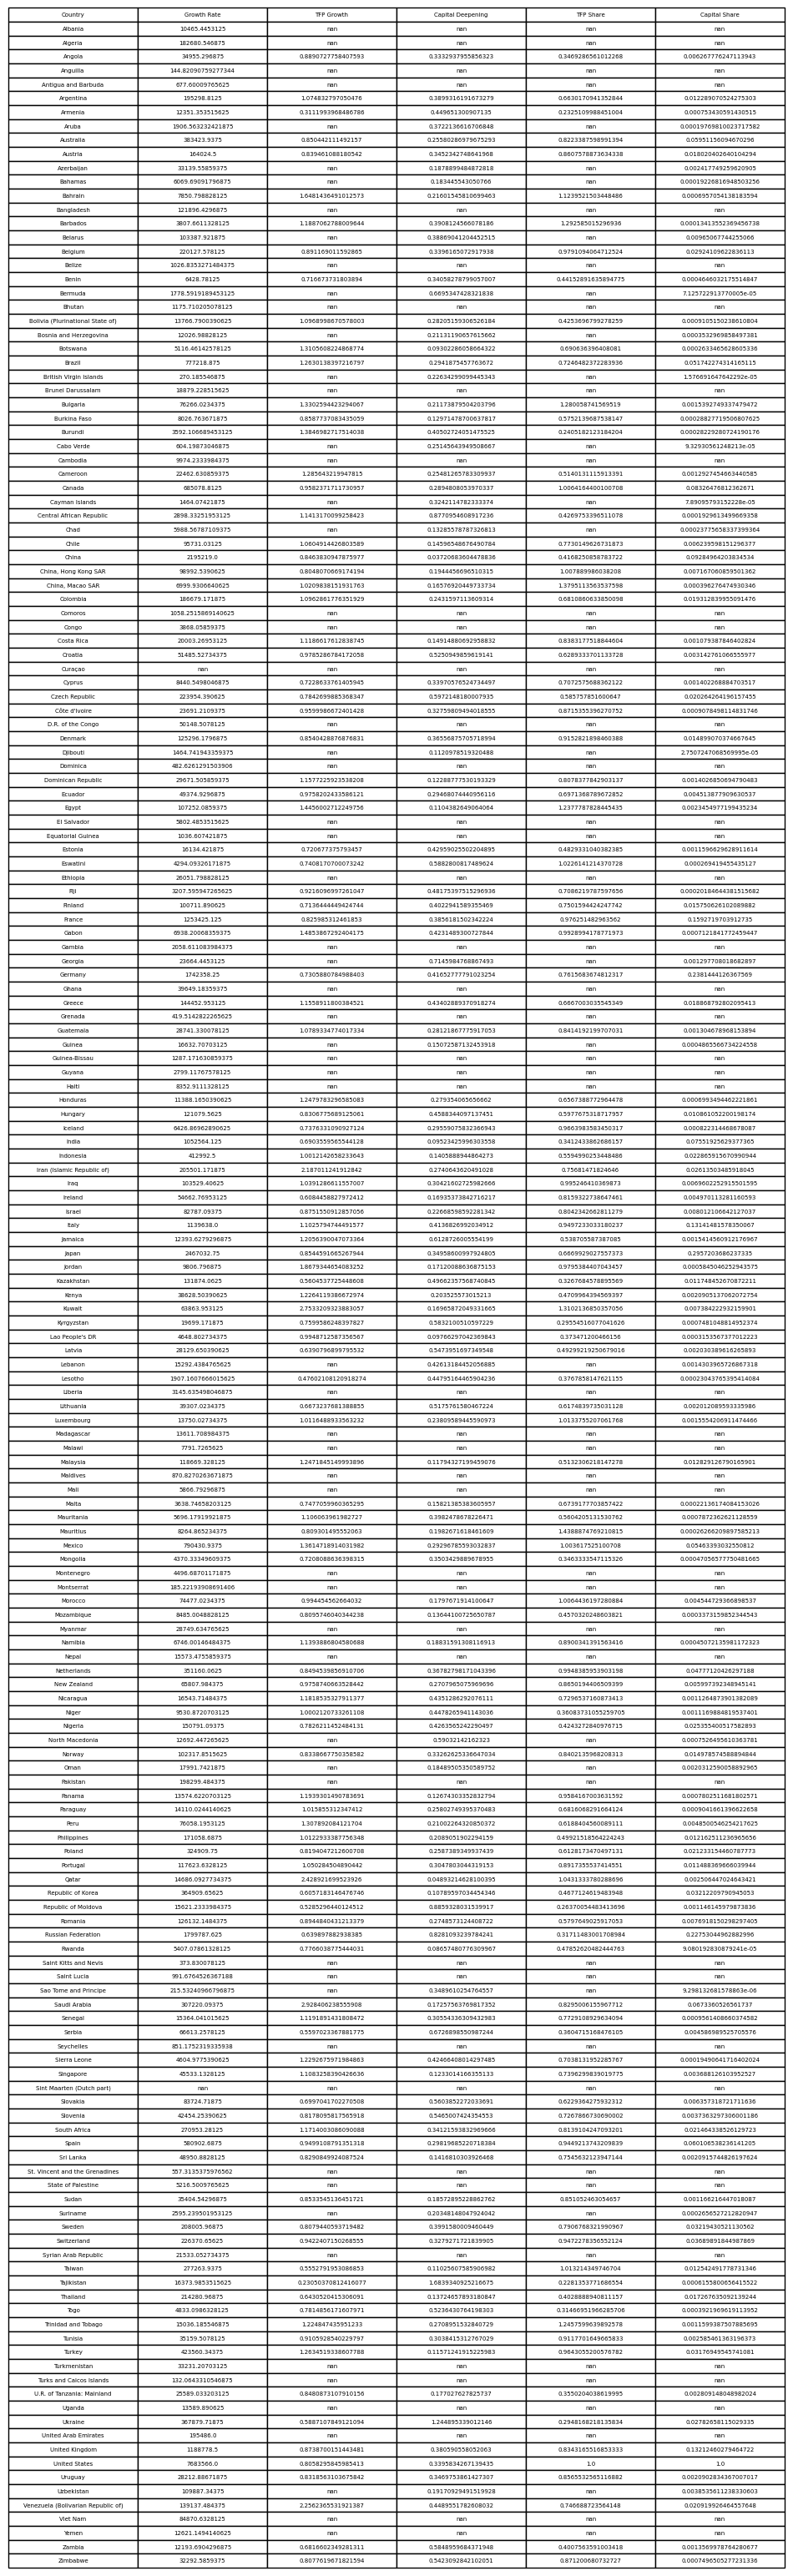

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load data
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')

# Display the first few rows to understand the structure
print(pwt1001.head())



# Filter the dataset for the years 1960-2000
pwt_filtered = pwt1001[(pwt1001['year'] >= 1960) & (pwt1001['year'] <= 2000)]

# Group by country and calculate averages for the relevant columns
# You'll need to adjust these column names based on the actual data structure
pwt_grouped = pwt_filtered.groupby('country').agg({
    'rgdpe': 'mean',  # Real GDP per capita
    'rtfpna': 'mean',  # Total Factor Productivity (TFP)
    'rkna': 'mean',  # Capital stock
    'ctfp': 'mean',  # TFP share
    'ck': 'mean'  # Capital share
}).reset_index()

# Rename columns to match the provided table
pwt_grouped.columns = ['Country', 'Growth Rate', 'TFP Growth', 'Capital Deepening', 'TFP Share', 'Capital Share']

# Plot the table
fig, ax = plt.subplots(figsize=(12, 8))  # set size frame
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=pwt_grouped.values, colLabels=pwt_grouped.columns, cellLoc='center', loc='center')

plt.show()
